<a href="https://colab.research.google.com/github/thisishasan/slda/blob/main/code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Download a Heart Failure Clinical Records dataset; the dataset originally source from UC Irvine Machine Learning Repository [https://archive.ics.uci.edu/dataset/519/heart+failure+clinical+records]

In [697]:
!wget -nc 'https://raw.githubusercontent.com/thisishasan/slda/refs/heads/main/dataset.csv'

File ‘dataset.csv’ already there; not retrieving.



Import the necessary libraries

In [698]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns
from scipy.stats import mannwhitneyu, ttest_ind
from scipy.stats import skew, kurtosis
from scipy.stats import shapiro, kstest, anderson, zscore, chi2_contingency
from scipy.stats import pearsonr, spearmanr, kendalltau, ttest_ind, mannwhitneyu, chi2_contingency
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.tree import plot_tree

Read and load the dataset csv file into a data frame

In [699]:
file_path = os.path.join('dataset.csv')
df = pd.read_csv(file_path)

Displays the data frame information


In [700]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  death_event               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [701]:
from IPython.display import display, HTML

# Data for the table
data_dict = {
    "Feature": [
        "age", "anaemia", "creatinine phosphokinase (CPK)", "diabetes",
        "ejection fraction", "high blood pressure", "platelets",
        "sex", "serum creatinine", "serum sodium", "smoking", "time", "[target] death event"
    ],
    "Description": [
        "Age of the patient (years)",
        "Decrease of red blood cells or hemoglobin (boolean)",
        "Level of the CPK enzyme in the blood (mcg/L)",
        "If the patient has diabetes (boolean)",
        "Percentage of blood leaving the heart at each contraction (percentage)",
        "If the patient has hypertension (boolean)",
        "Platelets in the blood (kiloplatelets/mL)",
        "Woman or man (binary)",
        "Level of serum creatinine in the blood (mg/dL)",
        "Level of serum sodium in the blood (mEq/L)",
        "If the patient smokes or not (boolean)",
        "Follow-up period (days)",
        "If the patient died during the follow-up period (boolean)"
    ]
}

# Creating the table as HTML
html_table = pd.DataFrame(data_dict).to_html(index=False, escape=False)
display(HTML(html_table))


Feature,Description
age,Age of the patient (years)
anaemia,Decrease of red blood cells or hemoglobin (boolean)
creatinine phosphokinase (CPK),Level of the CPK enzyme in the blood (mcg/L)
diabetes,If the patient has diabetes (boolean)
ejection fraction,Percentage of blood leaving the heart at each contraction (percentage)
high blood pressure,If the patient has hypertension (boolean)
platelets,Platelets in the blood (kiloplatelets/mL)
sex,Woman or man (binary)
serum creatinine,Level of serum creatinine in the blood (mg/dL)
serum sodium,Level of serum sodium in the blood (mEq/L)


By default, displays the top five rows of the data frame


In [702]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,death_event
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


Describe the data frame

In [703]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,death_event
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


List all numerical variables

In [704]:
numerical_vars = ['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium', 'time']

List all categorical variables

In [705]:
categorical_vars = ['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking', 'death_event']

Visualize numerical and categorical variable counts through Pie Chart

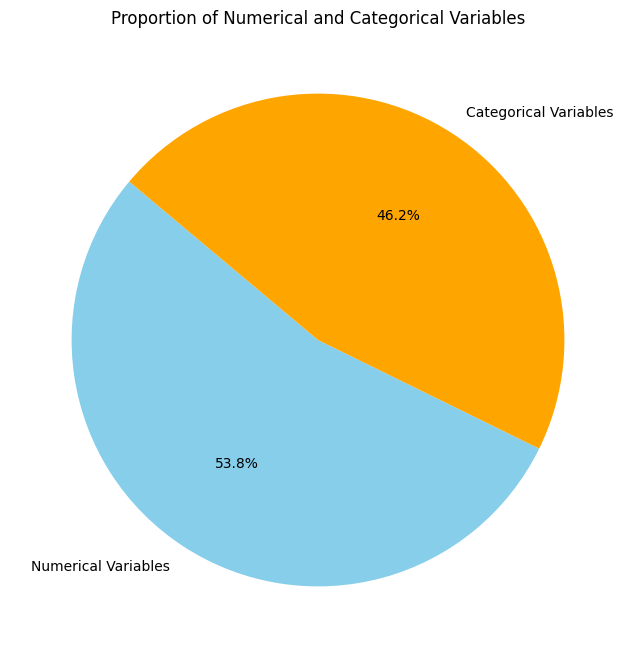

In [706]:
variable_counts = [len(numerical_vars), len(categorical_vars)]
labels = ['Numerical Variables', 'Categorical Variables']
plt.figure(figsize=(8, 8))
plt.pie(variable_counts, labels=labels, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'orange'])
plt.title('Proportion of Numerical and Categorical Variables')
plt.show()


Checks missing values in the data frame

In [707]:
df.isnull().sum()

,0
age,0
anaemia,0
creatinine_phosphokinase,0
diabetes,0
ejection_fraction,0
high_blood_pressure,0
platelets,0
serum_creatinine,0
serum_sodium,0
sex,0


Total counts of death events segregated by Yes or No

In [708]:
death_event_counts = df['death_event'].value_counts()
death_event_counts

,count
death_event,
0,203
1,96


Percentage of death events segregated by Yes or No

In [709]:
death_event_percentage = df['death_event'].value_counts(normalize=True) * 100
death_event_percentage_rounded = death_event_percentage.round(2)
death_event_percentage_rounded

,proportion
death_event,
0,67.89
1,32.11


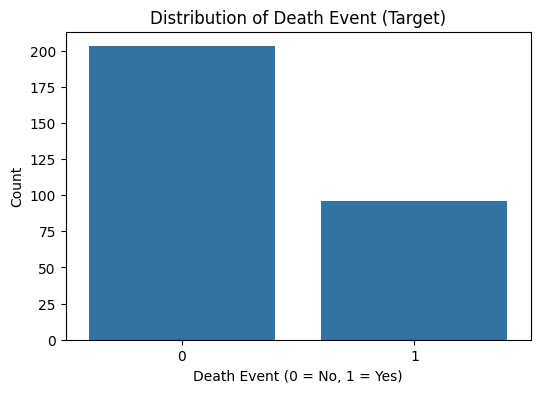

In [710]:
# Distribution of the target variable (death_event)
plt.figure(figsize=(6, 4))
sns.countplot(x='death_event', data=df)
plt.title("Distribution of Death Event (Target)")
plt.xlabel("Death Event (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

Visualization of Death Events

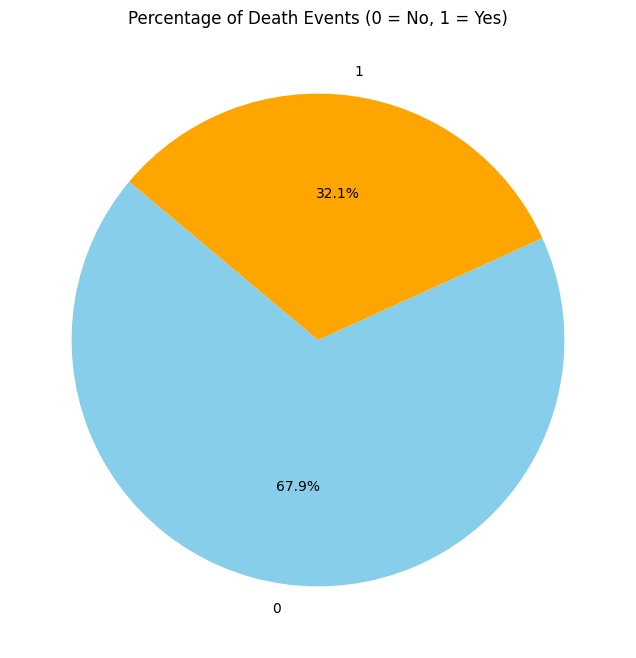

In [711]:
plt.figure(figsize=(8, 8))
death_event_percentage_rounded.plot.pie(autopct='%1.1f%%', startangle=140, colors=['skyblue', 'orange'])
plt.title('Percentage of Death Events (0 = No, 1 = Yes)')
plt.ylabel('')
plt.show()

In [712]:
filtered_df_by_deaths = df[df['death_event'] == 1]
filtered_df_by_deaths.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,death_event
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [713]:
filtered_df_by_not_deaths = df[df['death_event'] == 0]
filtered_df_by_not_deaths.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,death_event
14,49.0,1,80,0,30,1,427000.0,1.0,138,0,0,12,0
20,65.0,1,52,0,25,1,276000.0,1.3,137,0,0,16,0
23,53.0,0,63,1,60,0,368000.0,0.8,135,1,0,22,0
33,50.0,1,159,1,30,0,302000.0,1.2,138,0,0,29,0
38,60.0,0,2656,1,30,0,305000.0,2.3,137,1,0,30,0


## Univariate Analysis

Numerical Analysis



In [714]:
numerical_analysis = {}

for column in numerical_vars:
    data = df[column].dropna()
    numerical_analysis[column] = {
        "Mean": np.mean(data),
        "Median": np.median(data),
        "Mode": data.mode()[0] if not data.mode().empty else None,
        "Range": np.ptp(data),
        "Variance": np.var(data, ddof=1),
        "Standard Deviation": np.std(data, ddof=1),
        "Quantiles": np.percentile(data, [25, 50, 75]),
        "Skewness": data.skew(),
        "Kurtosis": data.kurt()
    }

numerical_analysis_df = pd.DataFrame(numerical_analysis)
display(numerical_analysis_df)

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time
Mean,60.833893,581.839465,38.083612,263358.029264,1.39388,136.625418,130.26087
Median,60.0,250.0,38.0,262000.0,1.1,137.0,115.0
Mode,60.0,582,35,263358.03,1.0,136,187
Range,55.0,7838,66,824900.0,8.9,35,281
Variance,141.486483,941458.571457,140.063455,9565668749.448879,1.070211,19.469956,6023.965276
Standard Deviation,11.894809,970.287881,11.834841,97804.236869,1.03451,4.412477,77.614208
Quantiles,"[51.0, 60.0, 70.0]","[116.5, 250.0, 582.0]","[30.0, 38.0, 45.0]","[212500.0, 262000.0, 303500.0]","[0.9, 1.1, 1.4]","[134.0, 137.0, 140.0]","[73.0, 115.0, 203.0]"
Skewness,0.423062,4.46311,0.555383,1.462321,4.455996,-1.048136,0.127803
Kurtosis,-0.184871,25.149046,0.041409,6.209255,25.828239,4.119712,-1.212048


In [715]:
# Outlier Detection using Z-Score and IQR
outliers = {}
for column in numerical_vars:
    data = df[column].dropna()
    z_scores = zscore(data)
    outliers[column] = {
        "Z-Score Outliers": len(data[np.abs(z_scores) > 3]),
        "IQR Outliers": len(data[(data < (np.percentile(data, 25) - 1.5 * (np.percentile(data, 75) - np.percentile(data, 25)))) |
                                  (data > (np.percentile(data, 75) + 1.5 * (np.percentile(data, 75) - np.percentile(data, 25))))])
    }

outliers_df = pd.DataFrame(outliers)
display(outliers_df)

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time
Z-Score Outliers,0,7,1,3,6,3,0
IQR Outliers,0,29,2,21,29,4,0


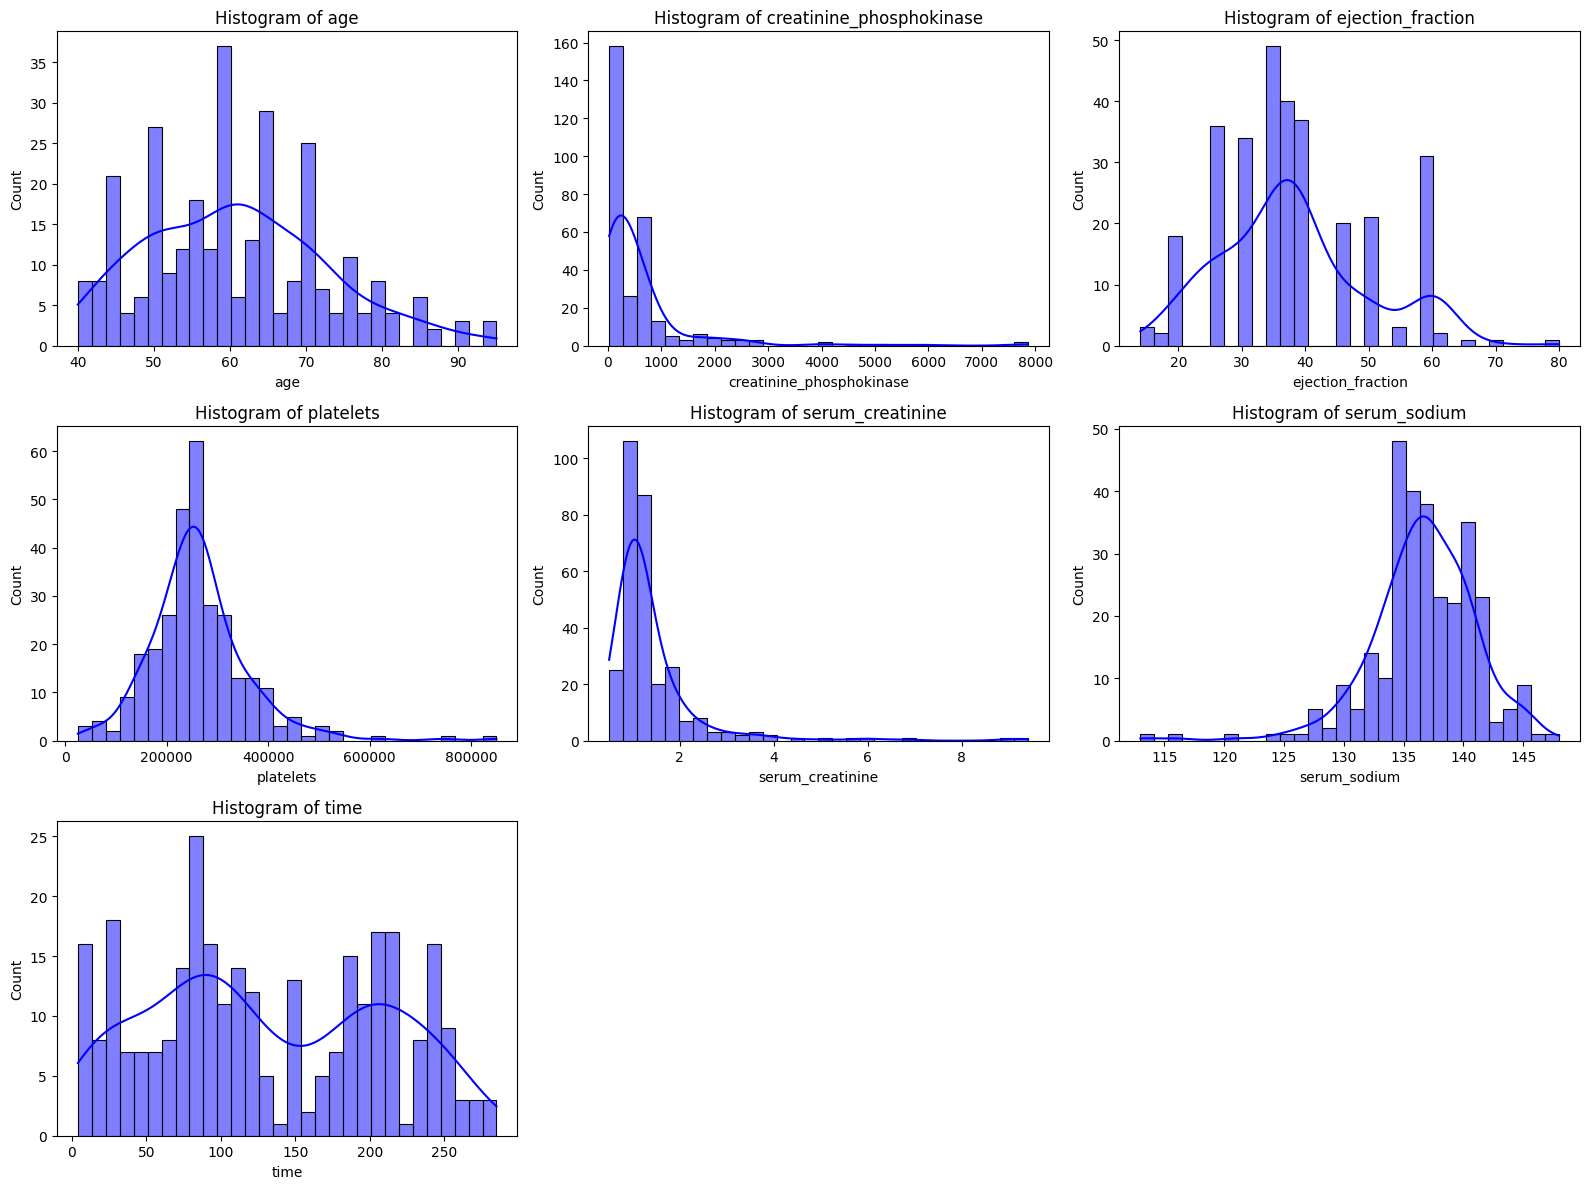

In [716]:
# Numerical Variables: Histograms and Boxplots
plt.figure(figsize=(16, 12))
for i, column in enumerate(numerical_vars, 1):
    # Updated subplot layout to accommodate all 7 numerical features (3 rows, 3 columns)
    plt.subplot(3, 3, i)
    sns.histplot(df[column], kde=True, bins=30, color='blue')
    plt.title(f"Histogram of {column}")

plt.tight_layout()
plt.show()

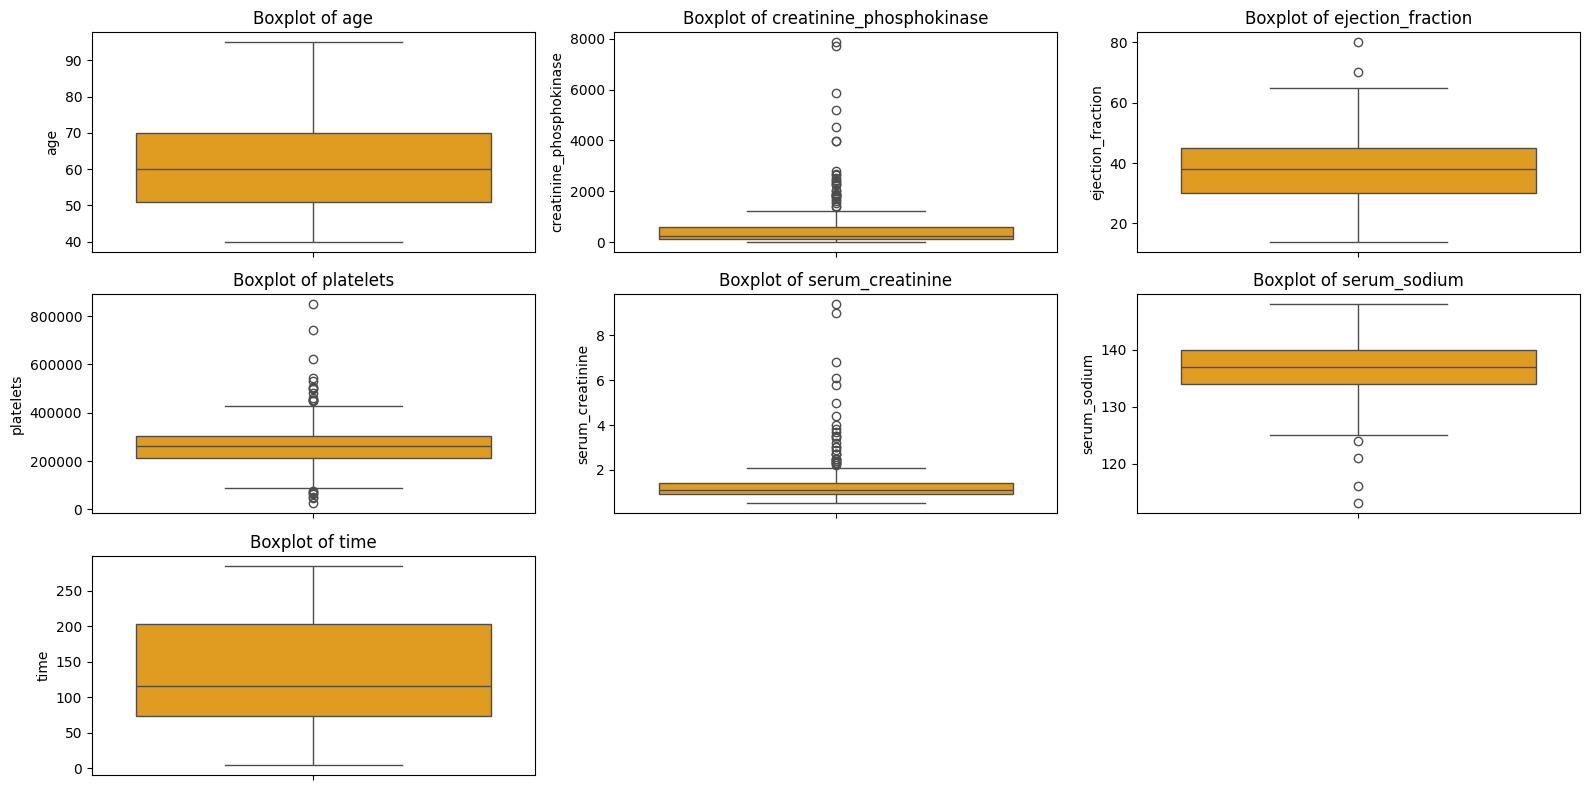

In [717]:
plt.figure(figsize=(16, 8))
for i, column in enumerate(numerical_vars, 1):
    # Updated subplot layout to accommodate all 7 numerical features (3 rows, 3 columns)
    plt.subplot(3, 3, i)
    sns.boxplot(y=df[column], color='orange')
    plt.title(f"Boxplot of {column}")

plt.tight_layout()
plt.show()

In [718]:
# For Categorical Variables
categorical_analysis = {}

for column in categorical_vars:
    data = df[column]
    categorical_analysis[column] = {
        "Counts": data.value_counts().to_dict(),
        "Percentages": (data.value_counts(normalize=True) * 100).to_dict()
    }
    # Chi-Square Goodness-of-Fit Test
    observed = data.value_counts()
    expected = [len(data) / len(observed)] * len(observed)  # Uniform distribution assumption
    chi2_stat, p_value, _, _ = chi2_contingency([observed, expected])
    categorical_analysis[column]["Chi-Square p-value"] = p_value

categorical_analysis_df = pd.DataFrame(categorical_analysis)
display(categorical_analysis_df)

,anaemia,diabetes,high_blood_pressure,sex,smoking,death_event
Counts,"{0: 170, 1: 129}","{0: 174, 1: 125}","{0: 194, 1: 105}","{1: 194, 0: 105}","{0: 203, 1: 96}","{0: 203, 1: 96}"
Percentages,"{0: 56.85618729096989, 1: 43.1438127090301}","{0: 58.19397993311036, 1: 41.80602006688963}","{0: 64.88294314381271, 1: 35.11705685618729}","{1: 64.88294314381271, 0: 35.11705685618729}","{0: 67.89297658862876, 1: 32.10702341137124}","{0: 67.89297658862876, 1: 32.10702341137124}"
Chi-Square p-value,0.109912,0.053798,0.000321,0.000321,0.000013,0.000013


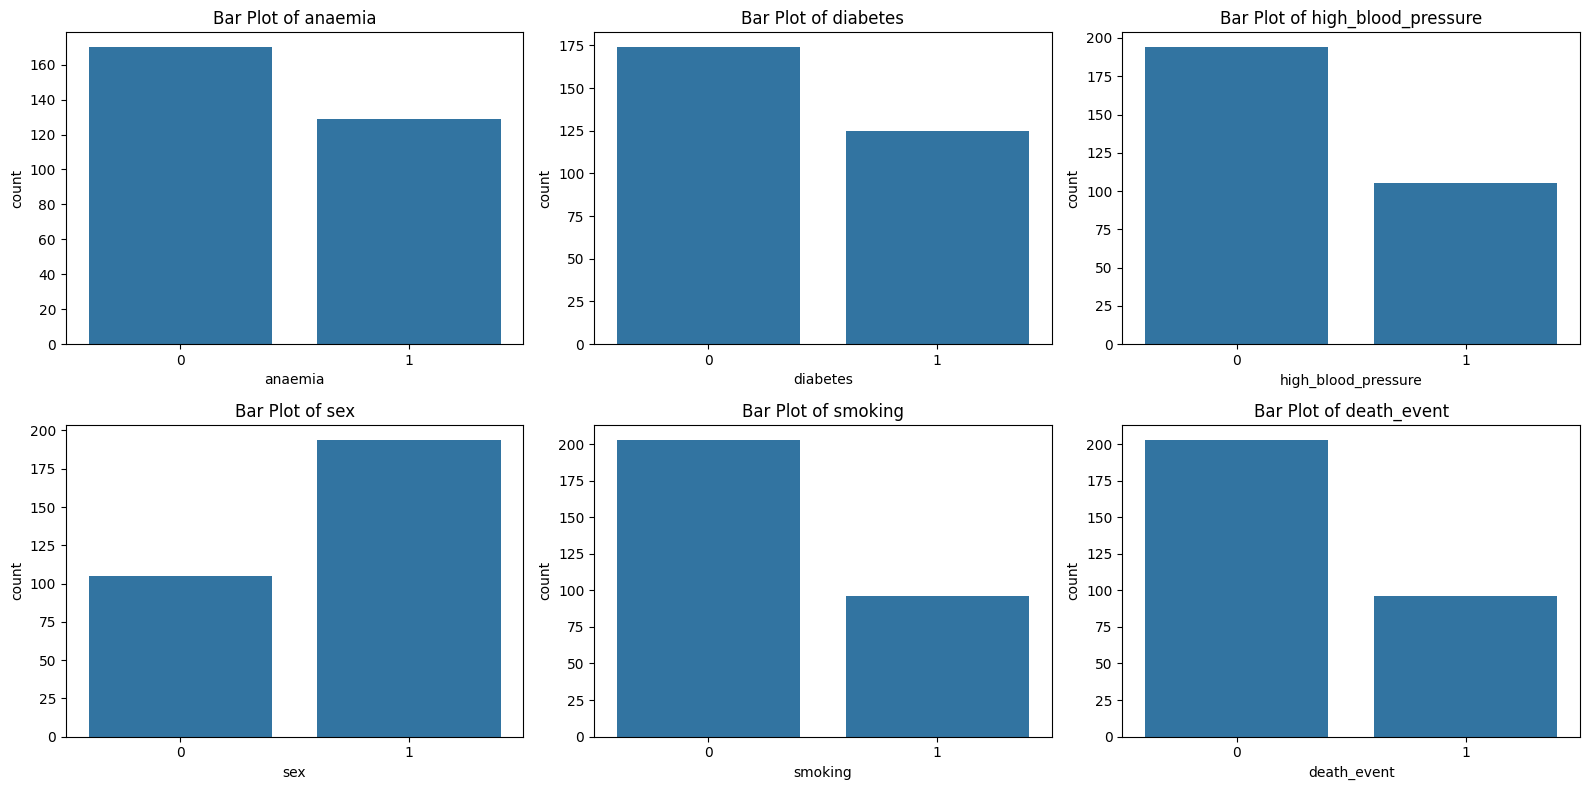

In [719]:
# Categorical Variables: Bar Plots
plt.figure(figsize=(16, 8))
for i, column in enumerate(categorical_vars, 1):
    plt.subplot(2, 3, i)
    sns.countplot(x=df[column])
    plt.title(f"Bar Plot of {column}")

plt.tight_layout()
plt.show()

## Bivariate Analysis

Categorical vs. Categorical Associations

In [720]:
categorical_associations = []
for i, cat1 in enumerate(categorical_vars):
    for cat2 in categorical_vars[i + 1:]:
        contingency_table = pd.crosstab(df[cat1], df[cat2])
        chi2_stat, p_value, _, _ = chi2_contingency(contingency_table)
        categorical_associations.append({
            "Variable 1": cat1,
            "Variable 2": cat2,
            "Chi-Square Statistic": chi2_stat,
            "p-value": p_value
        })

categorical_associations_df = pd.DataFrame(categorical_associations)
display(categorical_associations_df)

,Variable 1,Variable 2,Chi-Square Statistic,p-value
0,anaemia,diabetes,0.010351,9.189634e-01
1,anaemia,high_blood_pressure,0.289356,5.906333e-01
2,anaemia,sex,2.299464,1.294186e-01
3,anaemia,smoking,2.993480,8.360034e-02
4,anaemia,death_event,1.042175,3.073161e-01
5,diabetes,high_blood_pressure,0.009477,9.224497e-01
6,diabetes,sex,6.783853,9.198613e-03
7,diabetes,smoking,5.853025,1.555029e-02
8,diabetes,death_event,0.000000,1.000000e+00
9,high_blood_pressure,sex,2.829289,9.255934e-02


Numerical vs. Categorical Comparisions

In [721]:
group_comparisons = []
for num_var in numerical_vars:
    for cat_var in categorical_vars:
        group_0 = df[df[cat_var] == 0][num_var].dropna()
        group_1 = df[df[cat_var] == 1][num_var].dropna()
        t_stat, t_p = ttest_ind(group_0, group_1, equal_var=False)
        mw_stat, mw_p = mannwhitneyu(group_0, group_1)
        group_comparisons.append({
            "Numerical Variable": num_var,
            "Categorical Variable": cat_var,
            "t-Test p-value": t_p,
            "Mann-Whitney p-value": mw_p
        })

group_comparisons_df = pd.DataFrame(group_comparisons)
display(group_comparisons_df)

,Numerical Variable,Categorical Variable,t-Test p-value,Mann-Whitney p-value
0,age,anaemia,1.286160e-01,2.146308e-01
1,age,diabetes,7.218765e-02,1.218537e-01
2,age,high_blood_pressure,1.031417e-01,6.805434e-02
3,age,sex,2.478197e-01,3.188027e-01
4,age,smoking,7.420883e-01,6.032975e-01
5,age,death_event,4.735215e-05,1.667518e-04
6,creatinine_phosphokinase,anaemia,2.687168e-04,1.914257e-04
7,creatinine_phosphokinase,diabetes,8.658140e-01,4.655954e-01
8,creatinine_phosphokinase,high_blood_pressure,2.023102e-01,1.636746e-01
9,creatinine_phosphokinase,sex,1.058876e-01,8.189775e-01


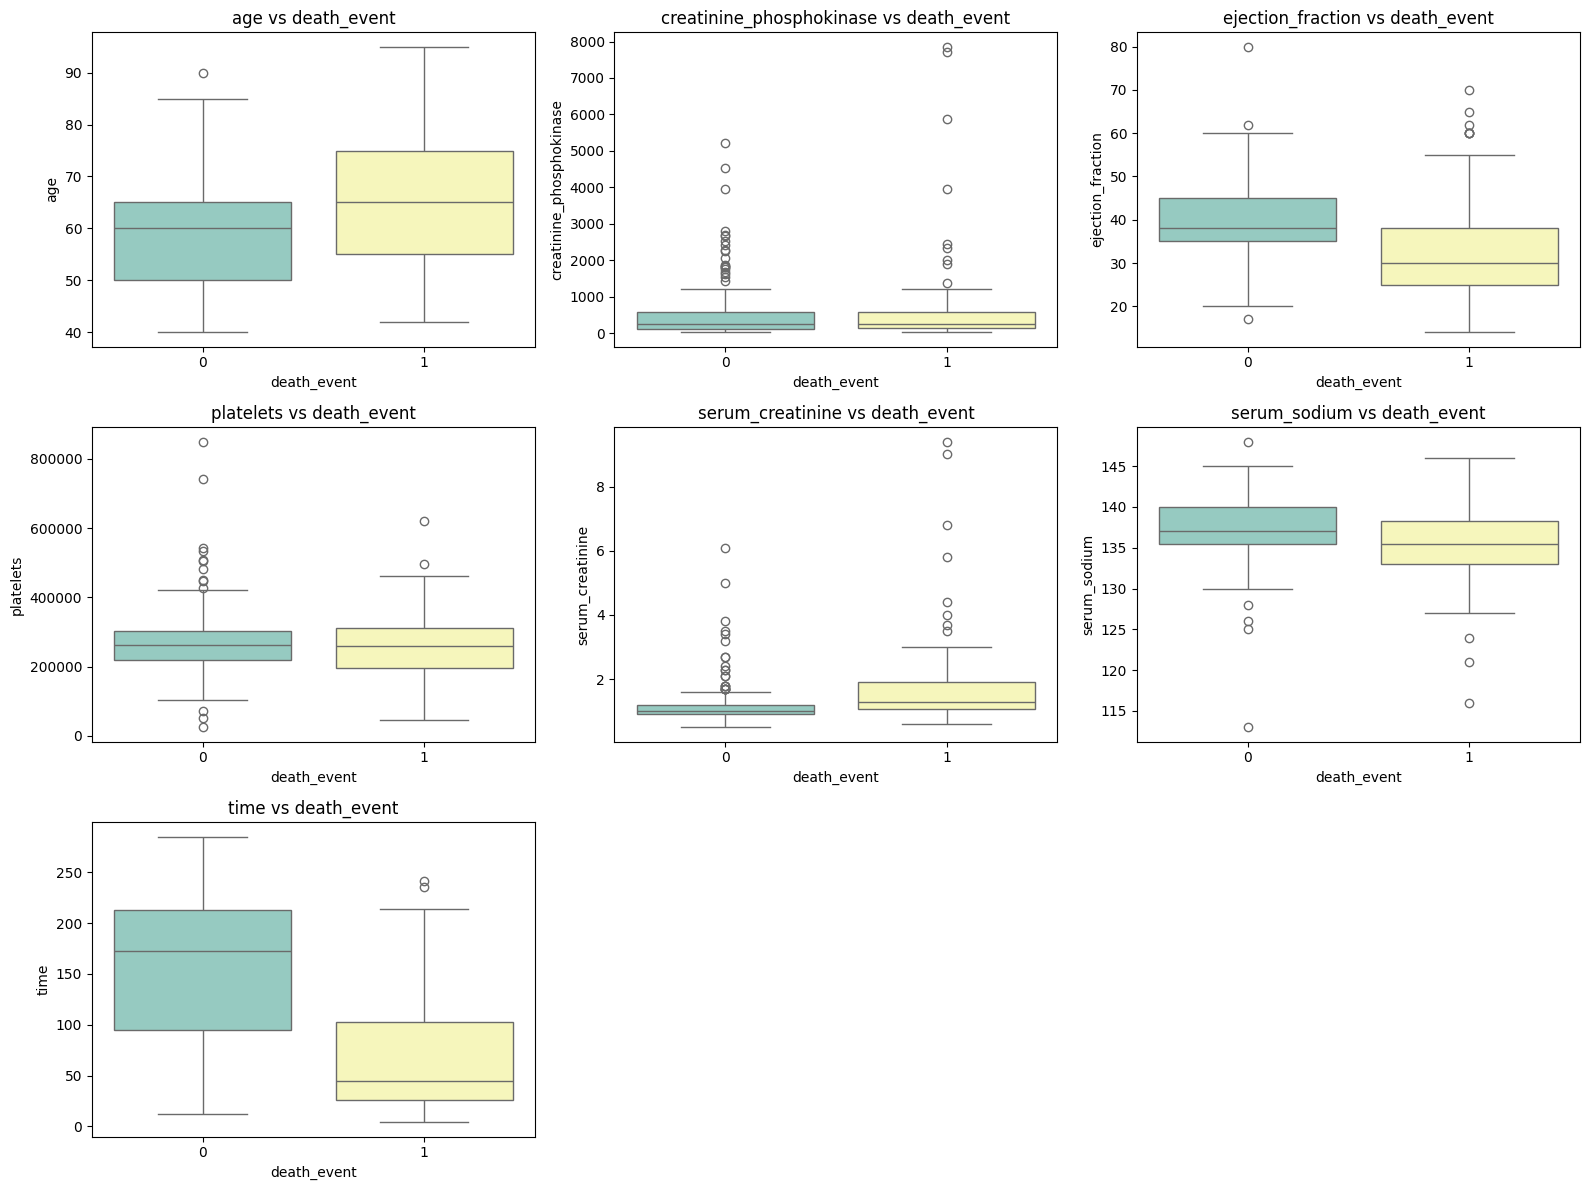

In [722]:
# Boxplots for Numerical vs Categorical
plt.figure(figsize=(16, 12))

# Adjust subplot layout to 3 rows x 3 columns to accommodate 7 numerical features
for i, num_var in enumerate(numerical_vars, 1):
    plt.subplot(3, 3, i)  # Changed to 3 rows, 3 columns
    sns.boxplot(x='death_event', y=num_var, data=df, hue='death_event', palette='Set3', dodge=False, legend=False)
    plt.title(f"{num_var} vs death_event")

plt.tight_layout()
plt.show()

## Multivariate Analysis

In [723]:
# Splitting the dataset into features and target
X = df[numerical_vars]
y = df['death_event']
X = X.dropna()  # Ensure no missing values in features
y = y.loc[X.index]  # Align target variable with feature rows

In [724]:
# Splitting into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [725]:
# Standardizing the features for PCA and models
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [726]:
# **1. Feature Engineering: PCA**
pca = PCA(n_components=2)  # Reducing to 2 components for visualization
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Explained variance by PCA components
pca_explained_variance = pca.explained_variance_ratio_

In [727]:
print("PCA Explained Variance")
display(pd.DataFrame(pca_explained_variance, columns=["Variance Ratio"]))

PCA Explained Variance


,Variance Ratio
0,0.204352
1,0.164231


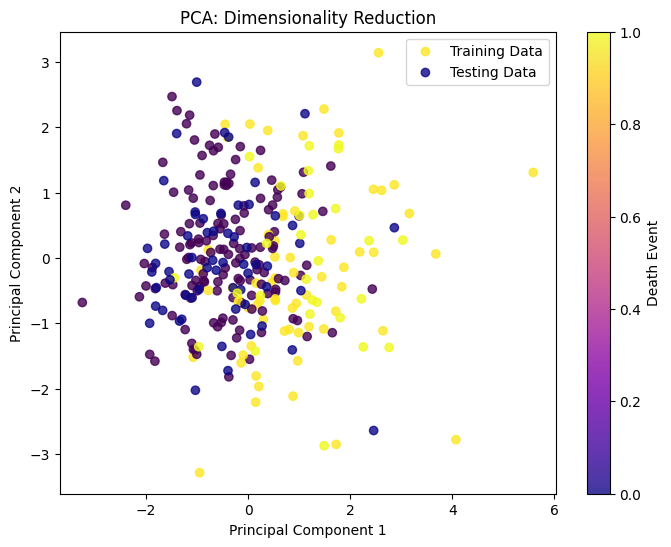

In [728]:
# PCA Scatter Plot
plt.figure(figsize=(8, 6))
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap='viridis', alpha=0.8, label='Training Data')
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_test, cmap='plasma', alpha=0.8, label='Testing Data')
plt.colorbar(label='Death Event')
plt.title("PCA: Dimensionality Reduction")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.show()

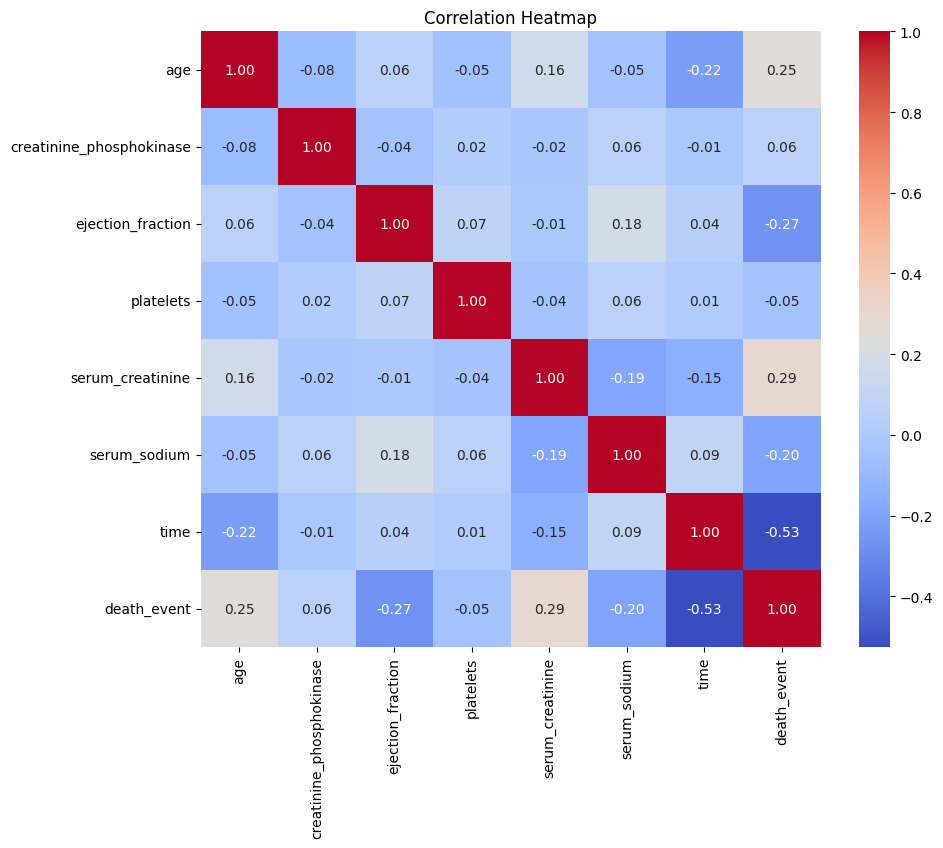

In [729]:
# Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df[numerical_vars + ['death_event']].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

### Classification Models

In [730]:
# Logistic Regression
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train_scaled, y_train)
y_pred_log = log_reg.predict(X_test_scaled)
log_reg_report = classification_report(y_test, y_pred_log, output_dict=True)
log_reg_roc_auc = roc_auc_score(y_test, log_reg.predict_proba(X_test_scaled)[:, 1])

In [731]:
# Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_scaled, y_train)
y_pred_rf = rf.predict(X_test_scaled)
rf_report = classification_report(y_test, y_pred_rf, output_dict=True)
rf_roc_auc = roc_auc_score(y_test, rf.predict_proba(X_test_scaled)[:, 1])

In [732]:
# Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_scaled, y_train)
y_pred_dt = dt.predict(X_test_scaled)
dt_report = classification_report(y_test, y_pred_dt, output_dict=True)
dt_roc_auc = roc_auc_score(y_test, dt.predict_proba(X_test_scaled)[:, 1])

### Classification Model Performance

In [733]:
display(pd.DataFrame({
        "Model": ["Logistic Regression", "Random Forest", "Decision Tree"],
        "Accuracy": [log_reg_report["accuracy"], rf_report["accuracy"], dt_report["accuracy"]],
        "ROC-AUC": [log_reg_roc_auc, rf_roc_auc, dt_roc_auc]
    }))

,Model,Accuracy,ROC-AUC
0,Logistic Regression,0.833333,0.873940
1,Random Forest,0.822222,0.887507
2,Decision Tree,0.711111,0.660260


In [734]:
# Plotting Model Performance: Accuracy and ROC-AUC
models = ["Logistic Regression", "Random Forest", "Decision Tree"]
accuracy_scores = [log_reg_report["accuracy"], rf_report["accuracy"], dt_report["accuracy"]]
roc_auc_scores = [log_reg_roc_auc, rf_roc_auc, dt_roc_auc]

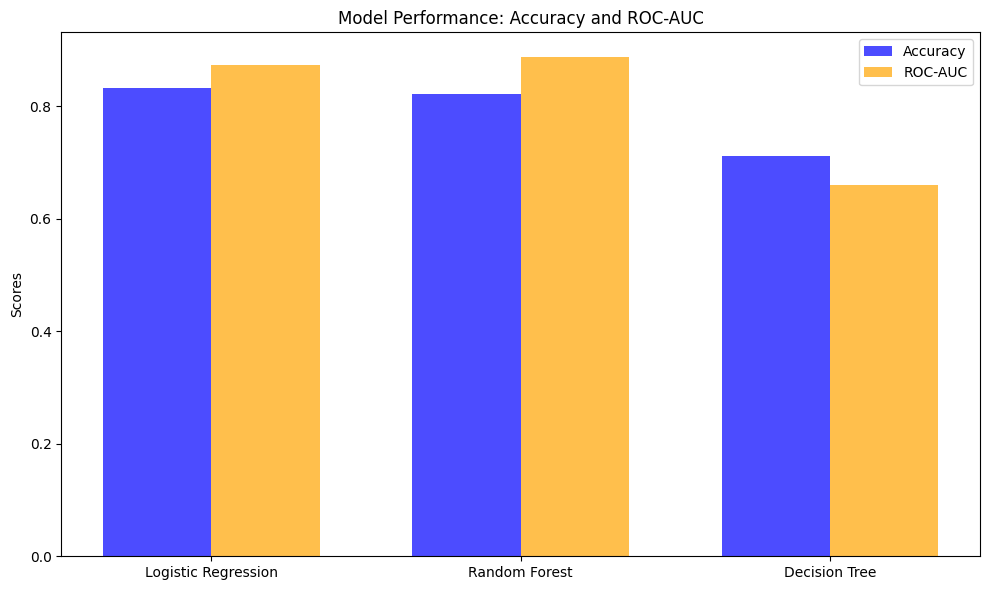

In [735]:
# Bar plot for accuracy and ROC-AUC
plt.figure(figsize=(10, 6))
x = np.arange(len(models))
width = 0.35

plt.bar(x - width/2, accuracy_scores, width, label='Accuracy', color='blue', alpha=0.7)
plt.bar(x + width/2, roc_auc_scores, width, label='ROC-AUC', color='orange', alpha=0.7)

plt.xticks(x, models)
plt.ylabel("Scores")
plt.title("Model Performance: Accuracy and ROC-AUC")
plt.legend()
plt.tight_layout()
plt.show()


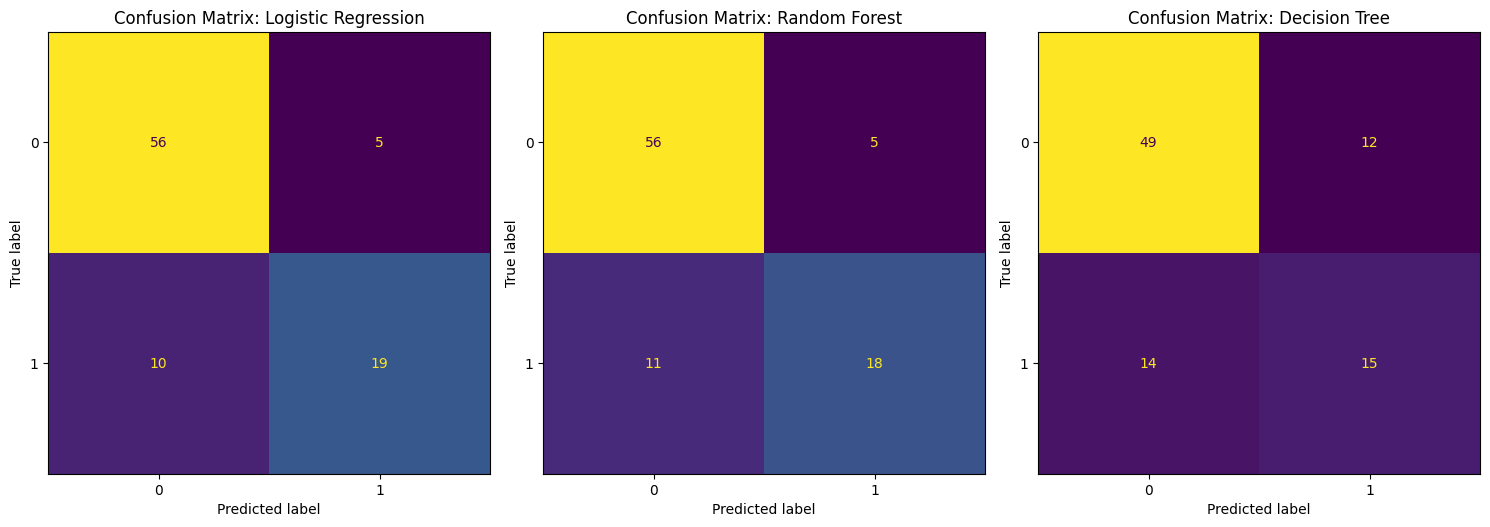

In [736]:
# Confusion Matrix for each model
models_dict = {
    "Logistic Regression": (y_test, log_reg.predict(X_test_scaled)),
    "Random Forest": (y_test, rf.predict(X_test_scaled)),
    "Decision Tree": (y_test, dt.predict(X_test_scaled))
}

# Plotting confusion matrices
plt.figure(figsize=(15, 5))
for i, (model_name, (true_values, predictions)) in enumerate(models_dict.items(), 1):
    plt.subplot(1, 3, i)
    ConfusionMatrixDisplay.from_predictions(true_values, predictions, ax=plt.gca(), colorbar=False)
    plt.title(f"Confusion Matrix: {model_name}")

plt.tight_layout()
plt.show()

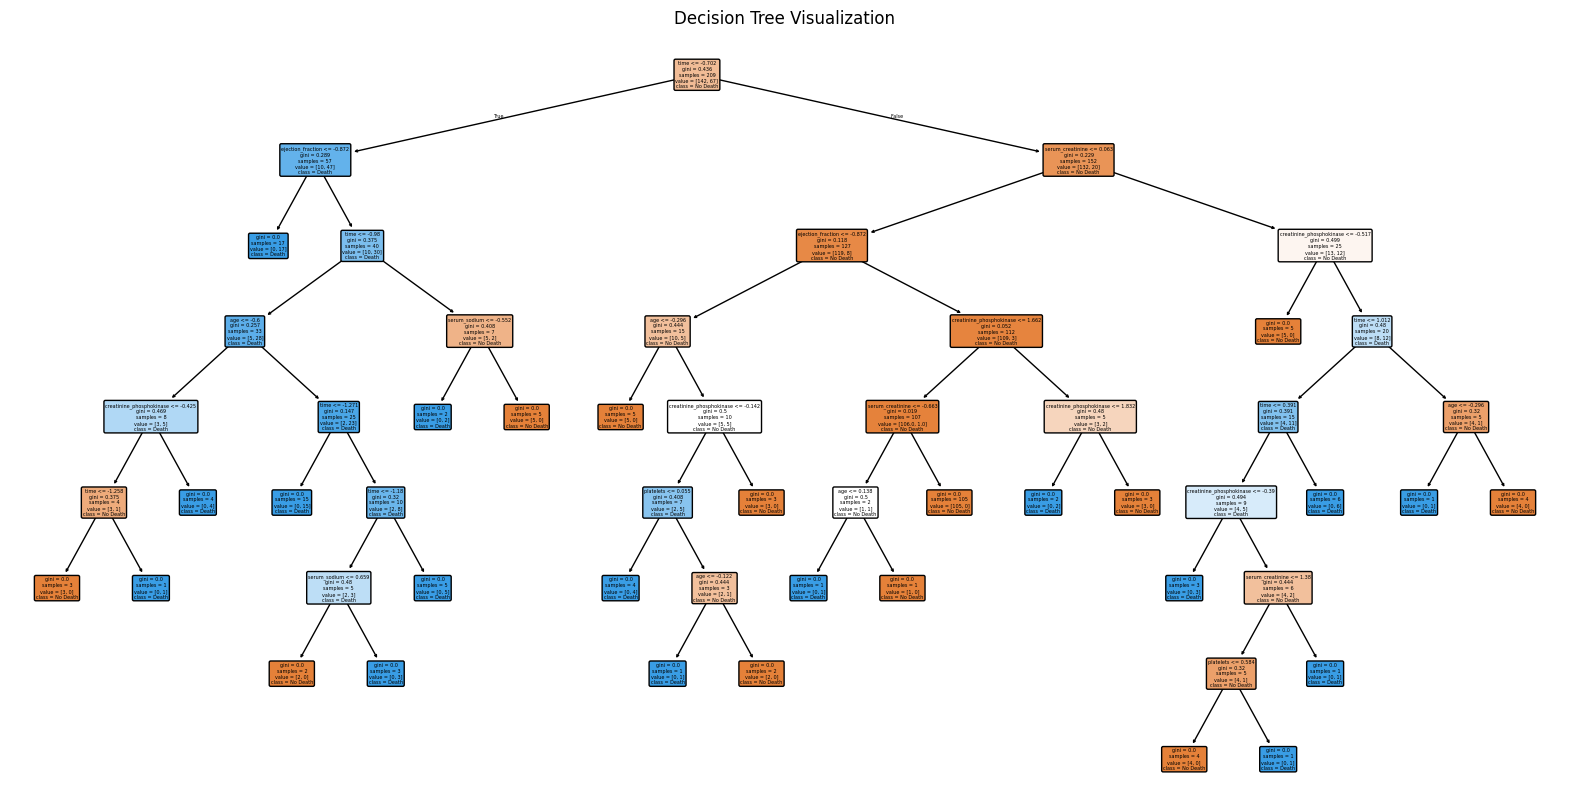

In [737]:
# **1. Visualizing Decision Tree**
plt.figure(figsize=(20, 10))
plot_tree(dt, feature_names=numerical_vars, class_names=['No Death', 'Death'], filled=True, rounded=True)
plt.title("Decision Tree Visualization")
plt.show()

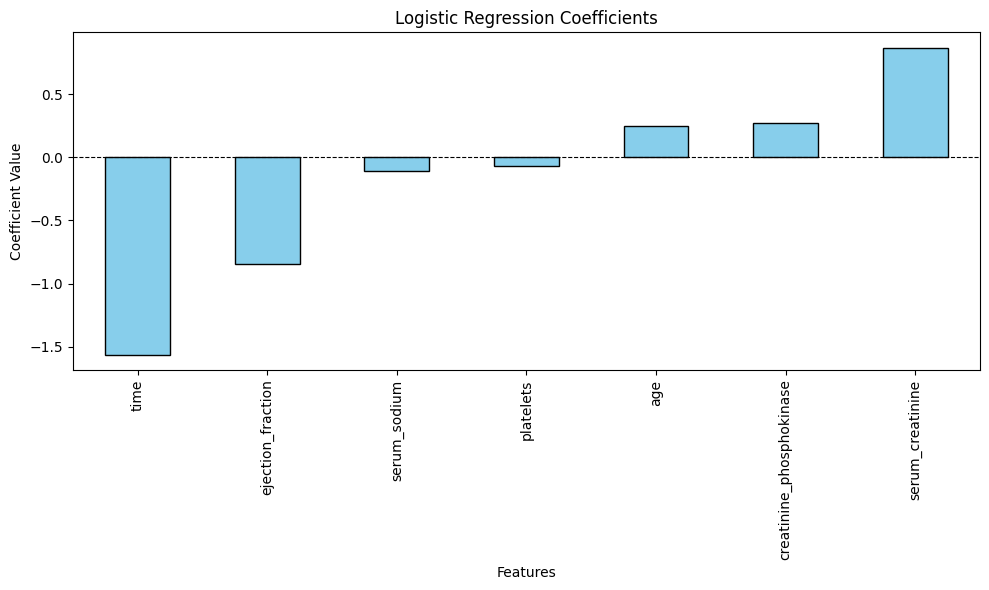

In [738]:
# **2. Visualizing Logistic Regression Coefficients**
plt.figure(figsize=(10, 6))
coefficients = pd.Series(log_reg.coef_[0], index=numerical_vars)
coefficients.sort_values().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Logistic Regression Coefficients")
plt.ylabel("Coefficient Value")
plt.xlabel("Features")
plt.axhline(0, color='black', linewidth=0.8, linestyle='--')
plt.tight_layout()
plt.show()

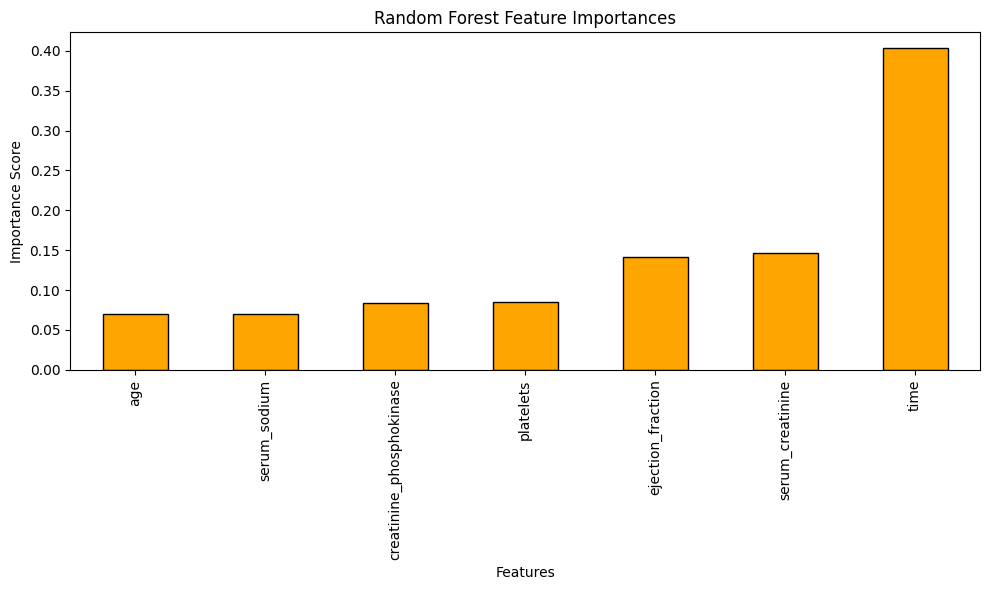

In [739]:
# **3. Visualizing Random Forest Feature Importances**
plt.figure(figsize=(10, 6))
feature_importances = pd.Series(rf.feature_importances_, index=numerical_vars)
feature_importances.sort_values().plot(kind='bar', color='orange', edgecolor='black')
plt.title("Random Forest Feature Importances")
plt.ylabel("Importance Score")
plt.xlabel("Features")
plt.tight_layout()
plt.show()
